In [48]:
from fplpandas import FPLPandas

In [49]:
import numpy as np

In [4]:
fpl = FPLPandas()

In [106]:
teams = fpl.get_teams()
teams

,code,draw,form,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
id,,,,,,,,,,,,,,,,,,,,
1,3,0,None,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1210,1170,1210,1190,1200,1
2,7,0,None,0,Aston Villa,0,0,0,AVL,3,None,False,0,1150,1160,1150,1150,1180,1210,2
3,36,0,None,0,Brighton,0,0,0,BHA,3,None,False,0,1080,1100,1150,1180,1090,1100,131
4,90,0,None,0,Burnley,0,0,0,BUR,2,None,False,0,1050,1080,1120,1190,1010,1030,43
5,8,0,None,0,Chelsea,0,0,0,CHE,4,None,False,0,1260,1280,1240,1280,1270,1310,4
6,31,0,None,0,Crystal Palace,0,0,0,CRY,3,None,False,0,1110,1150,1100,1150,1020,1050,6
7,11,0,None,0,Everton,0,0,0,EVE,3,None,False,0,1180,1210,1150,1170,1210,1250,7
8,54,0,None,0,Fulham,0,0,0,FUL,2,None,False,0,1000,1020,1020,1030,1020,1020,34
9,13,0,None,0,Leicester,0,0,0,LEI,4,None,False,0,1220,1240,1190,1190,1200,1180,26


In [23]:
player_summary, player_hist, player_fixtures, player_future = fpl.get_players()

In [91]:
fixtures = fpl.get_fixtures()

In [109]:
#Clean the Player Summary Table
convert_dict = {'value_season': float} 
player_summary = player_summary.astype(convert_dict)
player_summary['team'] = player_summary.team_code.map(teams.set_index('code').name)

In [111]:
player_summary[['web_name','team']]

,web_name,team
id,,
1,Özil,Arsenal
2,Sokratis,Arsenal
3,David Luiz,Arsenal
4,Aubameyang,Arsenal
5,Cédric,Arsenal
...,...,...
615,Richards,Wolves
616,Marques,Wolves
617,Söndergaard,Wolves


In [69]:
pivot = slim_player_summary.pivot_table(index='element_type',values='value',aggfunc=np.mean).reset_index()

In [70]:
pivot

,element_type,value
0,1,8.324242
1,2,6.030769
2,3,5.582741
3,4,5.300000


In [58]:
pivot_team = slim_player_summary.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index().sort_values('value', ascending=False)

In [60]:
pivot_team

,team,value
1,2,7.905263
9,10,7.625000
18,19,7.481818
15,16,7.231818
3,4,6.550000
11,12,6.408696
5,6,6.276190
16,17,6.259091
4,5,6.045833
0,1,5.960000


    second_name  element_type  value_season  now_cost  total_points
id                                                                 
96         Pope             1          17.0        54            92
12     Martínez             1          16.9        51            86
8          Leno             1          15.8        50            79
431   Fabianski             1          15.5        51            79
363    McCarthy             1          15.3        47            72
213     Meslier             1          14.9        47            70
217  Schmeichel             1          14.5        55            80
383      Lloris             1          14.1        56            79
325      Darlow             1          13.0        50            65
128      Guaita             1          12.9        48            62
       second_name  element_type  value_season  now_cost  total_points
id                                                                    
376       Bednarek             2          

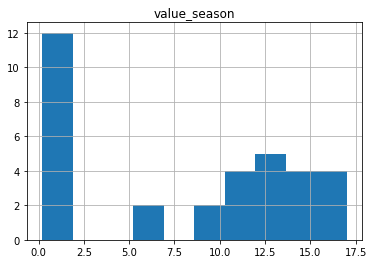

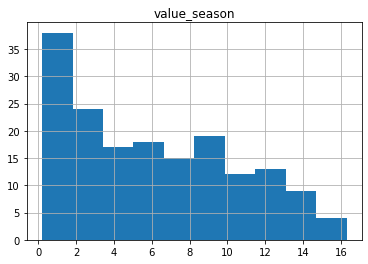

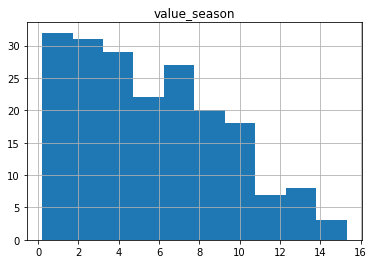

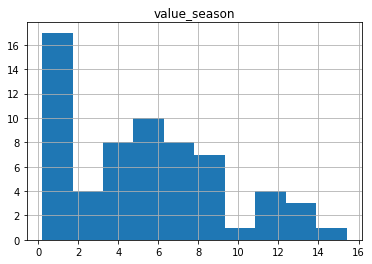

In [87]:
for element in [1,2,3,4]: 
    df = slim_player_summary.loc[slim_player_summary.element_type == element]
    df.hist('value_season')
    print(df[['second_name','element_type', 'value_season', 'now_cost', 'total_points']].sort_values('value_season', ascending=False).head(10))

In [88]:
player_future

id     code  team_h team_h_score  team_a team_a_score  \
player_id event                                                           
1         20.0   197  2128484      16         None       1         None   
          21.0   199  2128486       1         None      13         None   
          22.0   215  2128502      20         None       1         None   
          23.0   219  2128506       2         None       1         None   
          24.0   229  2128516       1         None      10         None   
...              ...      ...     ...          ...     ...          ...   
629       34.0   338  2128625      18         None      20         None   
          35.0   348  2128635      20         None       3         None   
          36.0   358  2128645      17         None      20         None   
          37.0   363  2128650       7         None      20         None   
          38.0   378  2128665      20         None      13         None   

                 finished  minutes  provisional_start_time  \
player_id event                                              
1         20.0      False        0                   False   
          21.0      False        0                   False   
          22.0      False        0                   False   
          23.0      False        0                   False   
          24.0      False        0                   False   
...                   ...      ...                     ...   
629       34.0      False        0                   False   
          35.0      False        0                   False   
          36.0      False        0                   False   
          37.0      False        0                   False   
          38.0      False        0                   False   

                         kickoff_time   event_name  is_home  difficulty  
player_id event                                                          
1         20.0   2021-01-26T20:15:00Z  Gameweek 20    False           3  
          21.0   2021-01-30T17:30:00Z  Gameweek 21     True           4  
          22.0   2021-02-02T18:00:00Z  Gameweek 22    False           3  
          23.0   2021-02-06T12:30:00Z  Gameweek 23    False           3  
          24.0   2021-02-14T16:30:00Z  Gameweek 24     True           2  
...                               ...          ...      ...         ...  
629       34.0   2021-05-01T14:00:00Z  Gameweek 34    False           2  
          35.0   2021-05-08T14:00:00Z  Gameweek 35     True           2  
          36.0   2021-05-12T18:45:00Z  Gameweek 36    False           4  
          37.0   2021-05-15T14:00:00Z  Gameweek 37    False           3  
          38.0   2021-05-23T15:00:00Z  Gameweek 38     True           4  

[12557 rows x 13 columns]

second_name             object
team                     int64
element_type             int64
selected_by_percent     object
now_cost                 int64
minutes                  int64
transfers_in             int64
value_season           float64
total_points             int64
value                  float64
dtype: object